In [4]:
# Dependencies
import random
import json
import requests as req
import openweathermapy.core as owm
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create random cities using latitude and longitude
def random(low,high,size):
    return np.random.uniform(low,high,size)

In [6]:
# Random latitudes
latitude = random(-180,180,3000)
len(latitude)

3000

In [7]:
# Random longitudes
longitude = random(-90,90,3000)
len(longitude)

3000

In [8]:
# Zip the coordinates into a tuple
coordinates = zip(latitude,longitude)
coordinates

In [9]:
#Create a list of cities based on coordinates
cities = []
countries = []

for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

city_list = []
country_list = []

for city in cities:
    name = city.city_name
    city_list.append(city.city_name)
    country_code = city.country_code
    country_list.append(city.country_code)
    print(name + " , " + country_code)

ushuaia , ar
coquimbo , cl
port elizabeth , za
barentsburg , sj
mantua , cu
qaanaaq , gl
dikson , ru
ushuaia , ar
ushuaia , ar
cape town , za
castro , cl
albany , au
east london , za
hermanus , za
bouar , cf
aksu , cn
longyearbyen , sj
port alfred , za
dikson , ru
ushuaia , ar
illoqqortoormiut , gl
bredasdorp , za
novobelokatay , ru
ushuaia , ar
albany , au
ushuaia , ar
qaanaaq , gl
hermanus , za
ushuaia , ar
hermanus , za
vila velha , br
jamestown , sh
port elizabeth , za
marsaxlokk , mt
ushuaia , ar
barentsburg , sj
attawapiskat , ca
barentsburg , sj
east london , za
belushya guba , ru
albany , au
hermanus , za
port alfred , za
cape town , za
rocha , uy
port elizabeth , za
salalah , om
port elizabeth , za
dudinka , ru
kavaratti , in
ushuaia , ar
villa sandino , ni
ushuaia , ar
daugavpils , lv
hermanus , za
dikson , ru
ushuaia , ar
dikson , ru
port elizabeth , za
dikson , ru
longyearbyen , sj
dikson , ru
namibe , ao
albany , au
illoqqortoormiut , gl
illoqqortoormiut , gl
longyearbyen 

tsihombe , mg
port elizabeth , za
ushuaia , ar
longyearbyen , sj
port elizabeth , za
mtambile , tz
cockburn town , tc
barentsburg , sj
andra , ru
qaanaaq , gl
codrington , ag
ilulissat , gl
ribeira grande , pt
port alfred , za
taolanaro , mg
dikson , ru
qaanaaq , gl
hermanus , za
qaanaaq , gl
port alfred , za
ushuaia , ar
ushuaia , ar
sindor , ru
warqla , dz
havre-saint-pierre , ca
iqaluit , ca
barentsburg , sj
dikson , ru
barentsburg , sj
marawi , sd
port alfred , za
ushuaia , ar
ushuaia , ar
sao desiderio , br
dikson , ru
ushuaia , ar
barra mansa , br
bikapur , in
ushuaia , ar
dikson , ru
mitsamiouli , km
ushuaia , ar
upernavik , gl
victoria , sc
ellisras , za
dinguiraye , gn
ushuaia , ar
ushuaia , ar
longyearbyen , sj
boundiali , ci
mandiana , gn
ushuaia , ar
dikson , ru
klaksvik , fo
cururupu , br
belushya guba , ru
beira , mz
clyde river , ca
ushuaia , ar
bathsheba , bb
meadville , us
cape town , za
krasnoselkup , ru
qaanaaq , gl
port elizabeth , za
cape town , za
illoqqortoormiut

In [10]:
# Convert to dataframe
df = pd.DataFrame({"name":city_list, "country_code":country_list})
df.head()

# Rearrange columns
df = df[["name","country_code"]]
df.head()

,name,country_code
0,ushuaia,ar
1,coquimbo,cl
2,port elizabeth,za
3,barentsburg,sj
4,mantua,cu


In [11]:
# Convert to df to remove duplicate cities 
unique_cities=df["name"].unique()
Sample_df= pd.DataFrame(unique_cities)
Sample_df.head()
len(Sample_df)
#Convert df to list
cities = Sample_df.values.tolist()
print(cities)

[['ushuaia'], ['coquimbo'], ['port elizabeth'], ['barentsburg'], ['mantua'], ['qaanaaq'], ['dikson'], ['cape town'], ['castro'], ['albany'], ['east london'], ['hermanus'], ['bouar'], ['aksu'], ['longyearbyen'], ['port alfred'], ['illoqqortoormiut'], ['bredasdorp'], ['novobelokatay'], ['vila velha'], ['jamestown'], ['marsaxlokk'], ['attawapiskat'], ['belushya guba'], ['rocha'], ['salalah'], ['dudinka'], ['kavaratti'], ['villa sandino'], ['daugavpils'], ['namibe'], ['pallasovka'], ['nouakchott'], ['tasiilaq'], ['bjelovar'], ['busselton'], ['upernavik'], ['lagoa'], ['thinadhoo'], ['los llanos de aridane'], ['saint-philippe'], ['pangnirtung'], ['vestmannaeyjar'], ['buzmeyin'], ['mrirt'], ['lerwick'], ['cidreira'], ['taolanaro'], ['aktash'], ['souillac'], ['ponta do sol'], ['macau'], ['viedma'], ['louis trichardt'], ['uniao da victoria'], ['quebrangulo'], ['georgetown'], ['mizque'], ['kodinar'], ['saint-pierre'], ['doctor pedro p. pena'], ['kruisfontein'], ['fond du lac'], ['parakou'], ['wa

In [12]:
# Convert the df to a list for iteration
new_city_list = []
for city in cities:
    new_city_list.append(city[0]) 
new_city_list

['ushuaia',
 'coquimbo',
 'port elizabeth',
 'barentsburg',
 'mantua',
 'qaanaaq',
 'dikson',
 'cape town',
 'castro',
 'albany',
 'east london',
 'hermanus',
 'bouar',
 'aksu',
 'longyearbyen',
 'port alfred',
 'illoqqortoormiut',
 'bredasdorp',
 'novobelokatay',
 'vila velha',
 'jamestown',
 'marsaxlokk',
 'attawapiskat',
 'belushya guba',
 'rocha',
 'salalah',
 'dudinka',
 'kavaratti',
 'villa sandino',
 'daugavpils',
 'namibe',
 'pallasovka',
 'nouakchott',
 'tasiilaq',
 'bjelovar',
 'busselton',
 'upernavik',
 'lagoa',
 'thinadhoo',
 'los llanos de aridane',
 'saint-philippe',
 'pangnirtung',
 'vestmannaeyjar',
 'buzmeyin',
 'mrirt',
 'lerwick',
 'cidreira',
 'taolanaro',
 'aktash',
 'souillac',
 'ponta do sol',
 'macau',
 'viedma',
 'louis trichardt',
 'uniao da victoria',
 'quebrangulo',
 'georgetown',
 'mizque',
 'kodinar',
 'saint-pierre',
 'doctor pedro p. pena',
 'kruisfontein',
 'fond du lac',
 'parakou',
 'warqla',
 'chuy',
 'hazorasp',
 'sao filipe',
 'tawkar',
 'udankudi

In [32]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/find?"
units = "imperial"

In [33]:
filename = 'apikey.py'

In [34]:
def get_file_contents(filename):
    """ Given a filename,
        return the contents of that file
    """
    try:
        with open(filename, 'r') as f:
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

In [37]:
api_key = get_file_contents(filename)

In [38]:
# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

In [12]:
# Request data from openweather api for each city in the list
weather_data = []

# Loop through the list of cities and perform a request for data on each
for city in new_city_list:
    weather_data.append(req.get(query_url + city).json())
weather_data

[{'cod': '200',
  'count': 1,
  'list': [{'clouds': {'all': 0},
    'coord': {'lat': 78.2198, 'lon': 15.6349},
    'dt': 1515297000,
    'id': 2729907,
    'main': {'humidity': 48,
     'pressure': 1000,
     'temp': 21.2,
     'temp_max': 21.2,
     'temp_min': 21.2},
    'name': 'Longyearbyen',
    'rain': None,
    'snow': None,
    'sys': {'country': 'NO'},
    'weather': [{'description': 'Sky is Clear',
      'icon': '01d',
      'id': 800,
      'main': 'Clear'}],
    'wind': {'deg': 110, 'speed': 24.16}}],
  'message': 'accurate'},
 {'cod': '200',
  'count': 1,
  'list': [{'clouds': {'all': 36},
    'coord': {'lat': -46.4276, 'lon': -67.5191},
    'dt': 1515299964,
    'id': 3863379,
    'main': {'grnd_level': 997.89,
     'humidity': 50,
     'pressure': 997.89,
     'sea_level': 1018.9,
     'temp': 67.17,
     'temp_max': 67.17,
     'temp_min': 67.17},
    'name': 'Mar del Plata',
    'rain': None,
    'snow': None,
    'sys': {'country': 'AR'},
    'weather': [{'description

In [14]:
# Sample response
weather_data[606]

{'cod': '200',
 'count': 1,
 'list': [{'clouds': {'all': 92},
   'coord': {'lat': 61.5996, 'lon': 5.0328},
   'dt': 1515298800,
   'id': 3156980,
   'main': {'humidity': 86,
    'pressure': 1021,
    'temp': 33.8,
    'temp_max': 33.8,
    'temp_min': 33.8},
   'name': 'Floro',
   'rain': None,
   'snow': None,
   'sys': {'country': 'NO'},
   'weather': [{'description': 'light shower sleet',
     'icon': '13n',
     'id': 612,
     'main': 'Snow'}],
   'wind': {'deg': 190, 'speed': 24.16}}],
 'message': 'accurate'}

In [15]:
len(weather_data)

635

In [16]:
# Extract required data from responses
city_name_data = []
country_name_data = []
temp_data = []
date_data = []
humidity_data = []
cloudiness_data = []
windspeed_data = []
lat_data = []
lon_data = []
x = len(weather_data)-1

for i in range(0,x):
    try:
        city = weather_data[i]["list"][0]["name"]
        city_name_data.append(city)
        country = weather_data[i]["list"][0]["sys"]["country"]
        country_name_data.append(country)
        temp = weather_data[i]["list"][0]["main"]["temp_max"]
        temp_data.append(temp)
        date = weather_data[i]["list"][0]["dt"]
        date_data.append(date)
        humidity = weather_data[i]["list"][0]["main"]["humidity"]
        humidity_data.append(humidity)
        cloudiness = weather_data[i]["list"][0]["clouds"]["all"]
        cloudiness_data.append(cloudiness)
        windspeed = weather_data[i]["list"][0]["wind"]["speed"]
        windspeed_data.append(windspeed)
        lat = weather_data[i]["list"][0]["coord"]["lat"]
        lat_data.append(lat)
        lon = weather_data[i]["list"][0]["coord"]["lon"]
        lon_data.append(lon)
    except:
        print(i)

summary_data = {"City": city_name_data, "Cloudiness": cloudiness_data, "Country": country_name_data, "Date": date_data, 
                "Humidity": humidity_data, "Lat": lat_data, "Lng": lon_data, "Max_Temp": temp_data, 
                "Windspeed": windspeed_data }
summary_data = pd.DataFrame(summary_data)
summary_data.head()

2
7
14
16
18
32
34
45
46
47
61
66
71
82
85
89
90
101
102
121
128
131
135
136
137
140
149
151
152
171
176
194
196
205
206
209
229
244
245
251
265
277
280
308
319
324
342
353
354
355
357
367
375
394
401
408
426
432
454
455
464
472
480
499
508
518
526
543
562
568
571
577
582
583
586
590
602
610
617
632


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Windspeed
0,Longyearbyen,0,NO,1515297000,48,78.2198,15.6349,21.20,24.16
1,Mar del Plata,36,AR,1515299964,50,-46.4276,-67.5191,67.17,17.49
2,Beisfjord,48,NO,1515298800,92,68.3751,17.5988,15.80,2.17
3,Ushuaia,40,AR,1515297600,71,-54.8070,-68.3074,51.80,5.82
4,Cape Town,90,ZA,1515297600,93,-33.9290,18.4174,66.20,13.87


In [17]:
len(summary_data)

554

In [18]:
summary_data.tail()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Windspeed
549,Njombe,44,TZ,1515300520,88,-9.3381,34.7694,67.44,8.55
550,Kaniama,88,CD,1515300520,99,-7.5667,24.1833,63.89,2.95
551,Morogoro,75,TZ,1515297600,94,-6.8162,37.6694,71.60,4.07
552,Mashhad,75,IR,1515297600,80,36.2975,59.6059,41.00,11.41
553,Zambezi,0,ZM,1515300523,71,-13.5501,23.1152,70.37,11.01


In [19]:
summary_data.to_csv('API.csv')

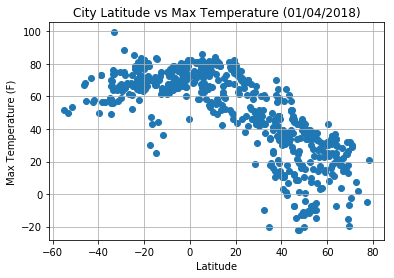

In [20]:
# Latitude vs Temp Plot
# Build a scatter plot for each data type
plt.scatter(summary_data["Lat"], summary_data["Max_Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (01/04/2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsTemperaturePlot")

# Show plot
plt.show()

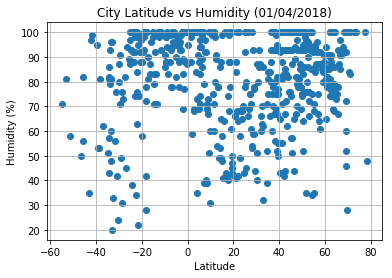

In [21]:
# Latitude vs Humidity Plot
# Build a scatter plot for each data type
plt.scatter(summary_data["Lat"], summary_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (01/04/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsHumidityPlot")

# Show plot
plt.show()

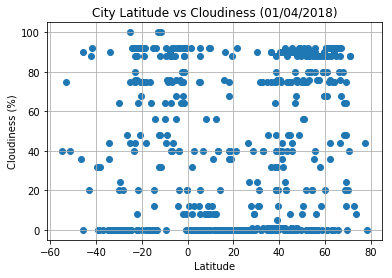

In [22]:
# Latitude vs Cloudiness Plot
# Build a scatter plot for each data type
plt.scatter(summary_data["Lat"], summary_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (01/04/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsCloudinessPlot")

# Show plot
plt.show()

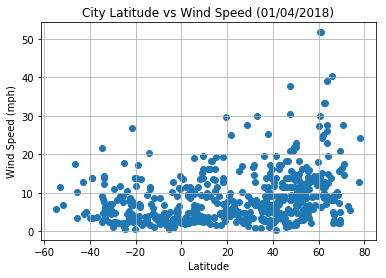

In [23]:
# Latitude vs Wind Speed Plot
# Build a scatter plot for each data type
plt.scatter(summary_data["Lat"], summary_data["Windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (01/04/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsWindspeedPlot")

# Show plot
plt.show()